# Tutorial 2: Data Preprocessing and Classification Analysis I_Part1I

## Question 6:  Decision Tree Classifier

We use a sample of the vertebrate data to demonstrate Decision Tree Classifoer.
Each vertebrate is classified into one of 5 category class: 
    
1)mammals

2)reptiles

3)birds

4)fishes

5)amphibians, 

based on a set of qualitative attributes (predictor variables). 

Except for the attribute "name", the rest of the attributes have been converted into a one 
hot encoding binary representation. 

### Explore the data with visual inspection

Step 1: Load Dataset into a Pandas DataFrame object and display its content.

**<font color="red">Code:Load Dataset</font>**

In [1]:
import pandas as pd

data = pd.read_csv('T2Q6_vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


Step 2 : Explore classification into binary class of mammals verus non-mammals

**<font color="red">Code:Classify class into either mammals or non mammals</font>**

In [2]:
data['Class'] = data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


Step 3 : Examine the relationship between the Warm-blooded and Gives Birth attributes with 
         respect to the class.

**<font color="red">Code:Explore relationship between attributes</font>**

In [3]:
pd.crosstab([data['Warm-blooded'],data['Gives Birth']],data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

### Explore the data with Decision Tree Classifier

### Train the model

Step 1 : Import tree module from sklearn.tree. 

**<font color="red">Code:</font>**

In [4]:
from sklearn import tree

Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

Step 2: Display the tree

**<font color="red">Code:</font>**

[Text(558.0, 906.0, 'Gives Birth <= 0.5\nentropy = 0.918\nsamples = 15\nvalue = [5, 10]\nclass = non-mammals'),
 Text(279.0, 543.6, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = non-mammals'),
 Text(837.0, 543.6, 'Warm-blooded <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]\nclass = mammals'),
 Text(558.0, 181.19999999999993, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = non-mammals'),
 Text(1116.0, 181.19999999999993, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = mammals')]

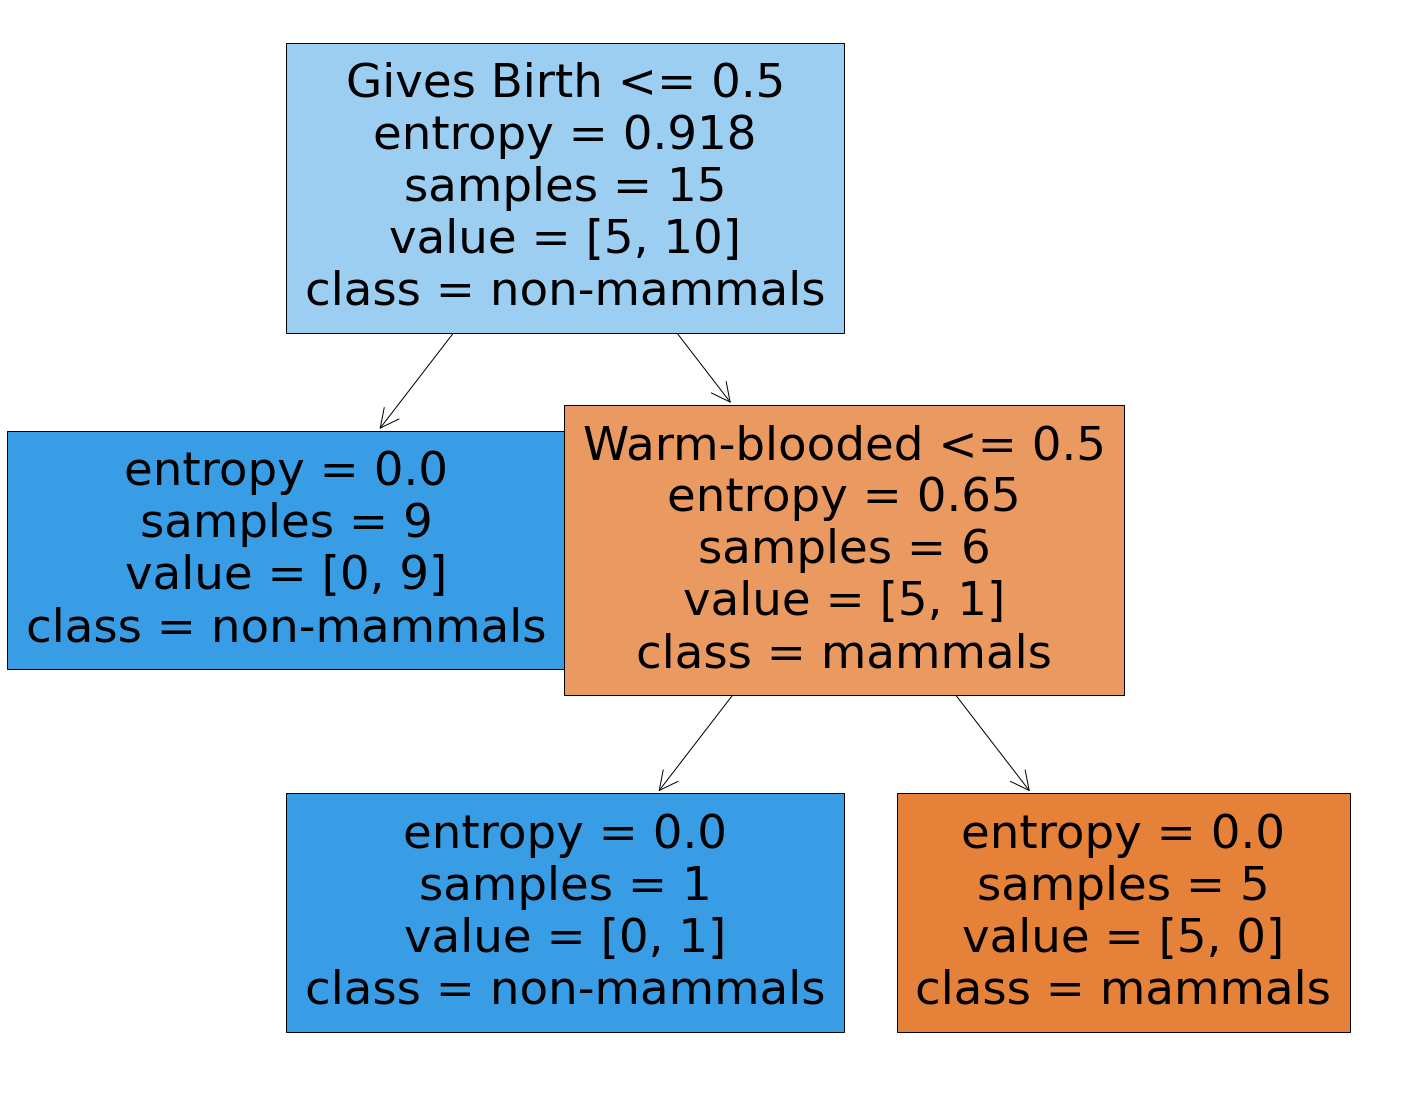

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=X.columns,class_names=Y,filled=True, impurity=True)


[Text(133.92000000000002, 181.2, 'X[1] <= 0.5\nentropy = 0.918\nsamples = 15\nvalue = [5, 10]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]')]

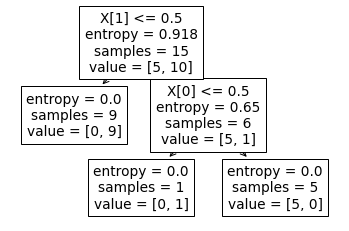

In [6]:
tree.plot_tree(clf)

### Test the model

Step 1: Load the testing dataset

**<font color="red">Code:</font>**

In [7]:
testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],
           ['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],
           ['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


Step 2 : Predict the class of the testing set

**<font color="red">Code:</font>**

In [8]:
testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Name,Predicted Class
0,gila monster,non-mammals
1,platypus,non-mammals
2,owl,non-mammals
3,dolphin,mammals


Step 3 : Show the accuracy

**<font color="red">Code:</font>**

In [9]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75
